This is an image classification training code implemented in PyTorch using the DenseNet-121 model. The main goal of the code is to classify images of fashion items into four categories: footwear, clothing, accessories and bags

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
from torchvision.models import DenseNet121_Weights

train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


train_dataset = datasets.ImageFolder(root='split_data/train', transform=train_transform)
test_dataset = datasets.ImageFolder(root='split_data/test', transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


model = models.densenet121(weights=None)
num_features = model.classifier.in_features
model.classifier = nn.Linear(num_features, len(train_dataset.classes))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)

def train_model(model, train_loader, criterion, optimizer, num_epochs=1):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        print(f"Starting epoch {epoch+1}/{num_epochs}...")
        progress_bar = tqdm(train_loader, desc=f"Training Epoch {epoch+1}", unit="batch")
        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            progress_bar.set_postfix(loss=loss.item())

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

    print("Training complete.")

This code trains on the DenseNet-121 model and defines functions to test the model, ultimately saving the trained model weight result.pth

In [3]:
import os
print("Current PID:", os.getpid())
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        progress_bar = tqdm(test_loader, desc="Testing", unit="batch")
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

train_model(model, train_loader, criterion, optimizer, num_epochs=20)

test_model(model, test_loader)

torch.save(model.state_dict(), 'result.pth')
print("Model saved as result.pth")

Current PID: 19744
Starting epoch 1/20...


Training Epoch 1: 100%|██████████| 1587/1587 [10:57<00:00,  2.41batch/s, loss=1.55]


Epoch [1/20], Loss: 1.9236
Starting epoch 2/20...


Training Epoch 2: 100%|██████████| 1587/1587 [10:12<00:00,  2.59batch/s, loss=1.47]


Epoch [2/20], Loss: 1.5026
Starting epoch 3/20...


Training Epoch 3: 100%|██████████| 1587/1587 [10:12<00:00,  2.59batch/s, loss=1.2]  


Epoch [3/20], Loss: 1.3160
Starting epoch 4/20...


Training Epoch 4: 100%|██████████| 1587/1587 [10:11<00:00,  2.59batch/s, loss=0.762]


Epoch [4/20], Loss: 1.1972
Starting epoch 5/20...


Training Epoch 5: 100%|██████████| 1587/1587 [10:13<00:00,  2.59batch/s, loss=0.973]


Epoch [5/20], Loss: 1.1109
Starting epoch 6/20...


Training Epoch 6: 100%|██████████| 1587/1587 [10:13<00:00,  2.59batch/s, loss=0.924]


Epoch [6/20], Loss: 1.0371
Starting epoch 7/20...


Training Epoch 7: 100%|██████████| 1587/1587 [10:15<00:00,  2.58batch/s, loss=1.1]  


Epoch [7/20], Loss: 0.9820
Starting epoch 8/20...


Training Epoch 8: 100%|██████████| 1587/1587 [10:14<00:00,  2.58batch/s, loss=1.01] 


Epoch [8/20], Loss: 0.9377
Starting epoch 9/20...


Training Epoch 9: 100%|██████████| 1587/1587 [10:13<00:00,  2.59batch/s, loss=1.05] 


Epoch [9/20], Loss: 0.9026
Starting epoch 10/20...


Training Epoch 10: 100%|██████████| 1587/1587 [10:18<00:00,  2.56batch/s, loss=1.03] 


Epoch [10/20], Loss: 0.8668
Starting epoch 11/20...


Training Epoch 11: 100%|██████████| 1587/1587 [10:17<00:00,  2.57batch/s, loss=0.841]


Epoch [11/20], Loss: 0.8440
Starting epoch 12/20...


Training Epoch 12: 100%|██████████| 1587/1587 [10:17<00:00,  2.57batch/s, loss=0.711]


Epoch [12/20], Loss: 0.8164
Starting epoch 13/20...


Training Epoch 13: 100%|██████████| 1587/1587 [10:19<00:00,  2.56batch/s, loss=0.744]


Epoch [13/20], Loss: 0.7893
Starting epoch 14/20...


Training Epoch 14: 100%|██████████| 1587/1587 [10:20<00:00,  2.56batch/s, loss=0.803]


Epoch [14/20], Loss: 0.7767
Starting epoch 15/20...


Training Epoch 15: 100%|██████████| 1587/1587 [10:17<00:00,  2.57batch/s, loss=1.07] 


Epoch [15/20], Loss: 0.7566
Starting epoch 16/20...


Training Epoch 16: 100%|██████████| 1587/1587 [10:17<00:00,  2.57batch/s, loss=0.837]


Epoch [16/20], Loss: 0.7360
Starting epoch 17/20...


Training Epoch 17: 100%|██████████| 1587/1587 [10:16<00:00,  2.57batch/s, loss=0.592]


Epoch [17/20], Loss: 0.7225
Starting epoch 18/20...


Training Epoch 18: 100%|██████████| 1587/1587 [10:17<00:00,  2.57batch/s, loss=0.947]


Epoch [18/20], Loss: 0.7161
Starting epoch 19/20...


Training Epoch 19: 100%|██████████| 1587/1587 [10:17<00:00,  2.57batch/s, loss=0.659]


Epoch [19/20], Loss: 0.6952
Starting epoch 20/20...


Training Epoch 20: 100%|██████████| 1587/1587 [10:21<00:00,  2.55batch/s, loss=0.778]


Epoch [20/20], Loss: 0.6810
Training complete.


Testing:   0%|          | 0/397 [01:28<?, ?batch/s]

Test Accuracy: 85.81%
Model saved as result.pth


In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

The main purpose of this code is to load the DenseNet-121 model and evaluate its accuracy and weighted F1 score on the test set. In addition, it selected several images from the test set and showed the top 5 prediction categories for each image and their corresponding probabilities.

Evaluating on the entire test set...

Test Accuracy: 84.71%
Weighted F1 Score: 0.84


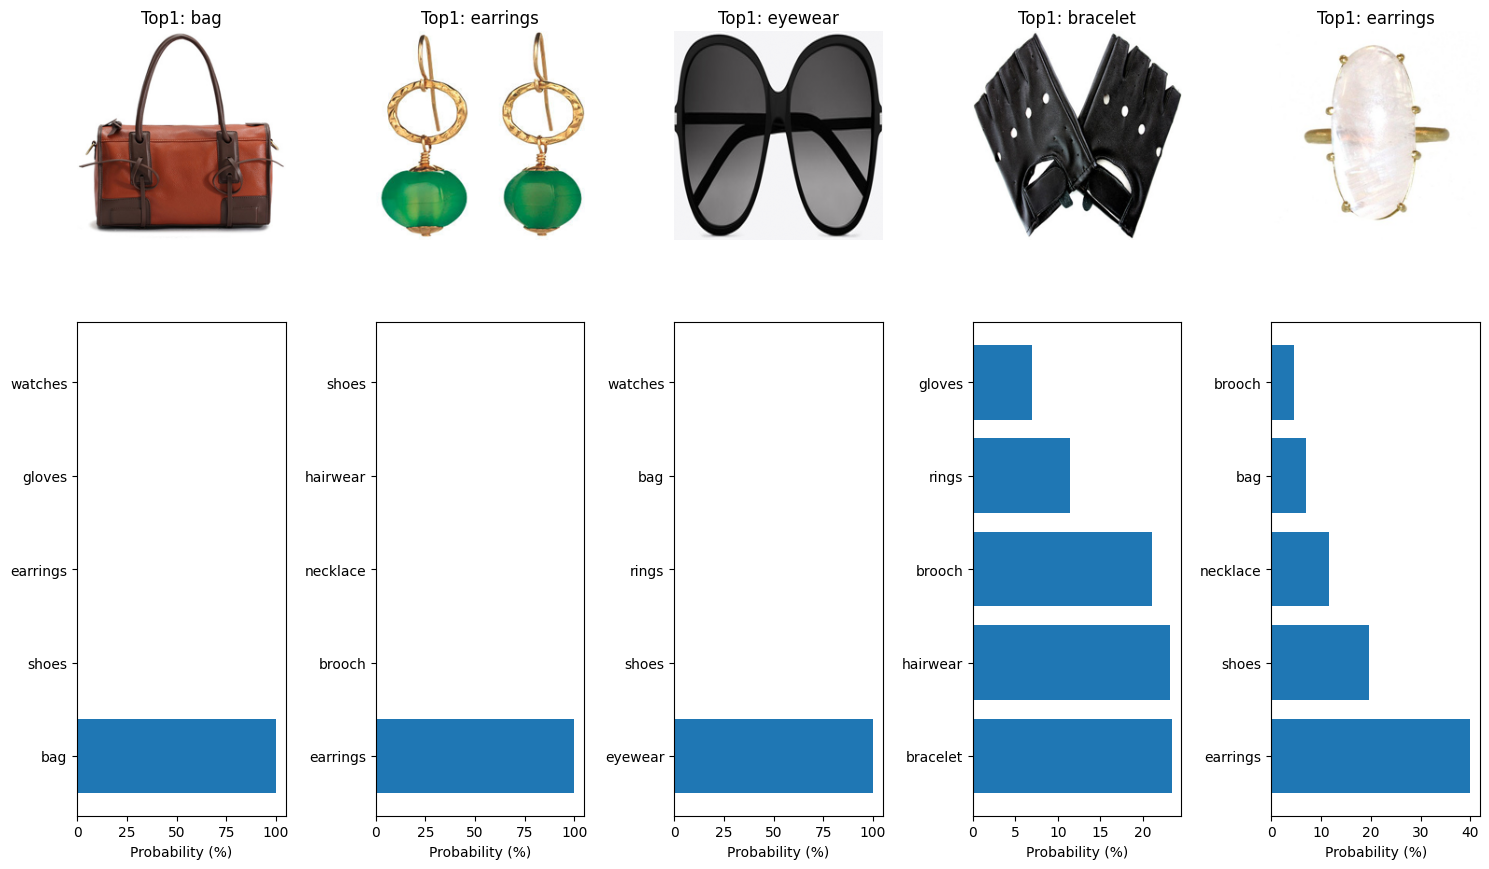

In [5]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
import sys

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_dir = "split_data/test"
test_dataset = datasets.ImageFolder(test_dir, transform=test_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = models.densenet121(weights=None)
model.classifier = torch.nn.Linear(model.classifier.in_features, 20)
model.load_state_dict(torch.load("result.pth", map_location=device))
model = model.to(device)
model.eval()

class_names = test_dataset.classes

correct = 0
total = 0
all_preds = []
all_labels = []

print("Evaluating on the entire test set...")
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (preds == labels).sum().item()

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = 100 * correct / total

f1_scores = []
num_classes = len(class_names)
for cls in range(num_classes):
    true_positives = sum((np.array(all_preds) == cls) & (np.array(all_labels) == cls))
    predicted_positives = sum(np.array(all_preds) == cls)
    actual_positives = sum(np.array(all_labels) == cls)

    precision = true_positives / predicted_positives if predicted_positives > 0 else 0
    recall = true_positives / actual_positives if actual_positives > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    f1_scores.append(f1 * actual_positives)

# Weighted F1 score
weighted_f1_score = sum(f1_scores) / total

print(f"\nTest Accuracy: {accuracy:.2f}%")
print(f"Weighted F1 Score: {weighted_f1_score:.2f}")

image_paths = [
    "split_data/test/bag/102784872_4.jpg",
    "split_data/test/earrings/12690998_10.jpg",
    "split_data/test/eyewear/120631641_10.jpg",
    "split_data/test/gloves/67951070_6.jpg",
    "split_data/test/rings/78167019_5.jpg"
]

plt.figure(figsize=(15, 10))
for i, image_path in enumerate(image_paths):
    # Load and transform the image
    image = Image.open(image_path).convert("RGB")
    input_image = test_transforms(image).unsqueeze(0).to(device)

    # Get model output and top predictions
    with torch.no_grad():
        output = model(input_image)
        top5_prob, top5_idx = torch.topk(output.softmax(dim=1), 5)
        top5_labels = [class_names[idx] for idx in top5_idx[0].cpu().numpy()]

    image_np = np.array(image.resize((224, 224))) / 255.0

    plt.subplot(2, 5, i + 1)
    plt.imshow(image_np)
    plt.title(f"Top1: {top5_labels[0]}")
    plt.axis('off')

    plt.subplot(2, 5, 5 + i + 1)
    plt.barh(top5_labels, (top5_prob[0].cpu().numpy() * 100).clip(0, 100))
    plt.xlabel('Probability (%)')

plt.tight_layout()
plt.show()
